**13.** Discrete data: Table 2.2 gives the number of fatal accidents and deaths on scheduled
airline flights per year over a ten-year period. We use these data as a numerical example
for fitting discrete data models.

**(a)** Assume that the numbers of fatal accidents in each year are independent with a
$Poisson(θ)$ distribution. Set a prior distribution for $θ$ and determine the posterior
distribution based on the data from 1976 through 1985. Under this model, give a 95%
predictive interval for the number of fatal accidents in 1986. You can use the normal
approximation to the gamma and Poisson or compute using simulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from io import StringIO

In [2]:
table = """
Year Accidents Deaths Rate
1976 24 734 0.19
1977 25 516 0.12
1978 31 754 0.15
1979 31 877 0.16
1980 22 814 0.14
1981 21 362 0.06
1982 26 764 0.13
1983 20 809 0.13
1984 16 223 0.03
1985 22 1066 0.15
"""

In [3]:
data = pd.read_csv(StringIO(table), delimiter=" ")

In [4]:
print(data.head())

   Year  Accidents  Deaths  Rate
0  1976         24     734  0.19
1  1977         25     516  0.12
2  1978         31     754  0.15
3  1979         31     877  0.16
4  1980         22     814  0.14


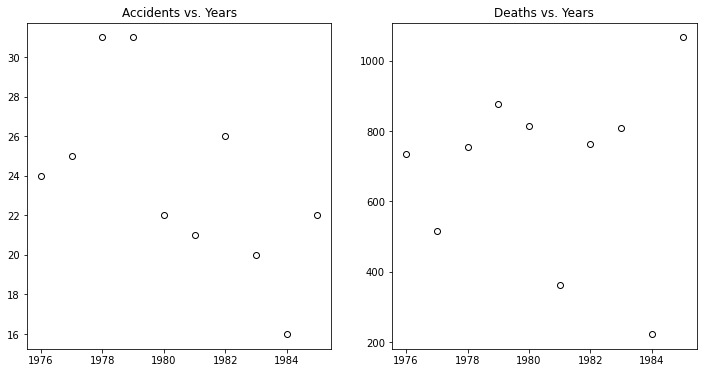

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax[0].scatter(data.Year.values, data.Accidents.values, edgecolor = 'black', facecolor = 'white')
ax[0].title.set_text('Accidents vs. Years')
ax[1].scatter(data.Year.values, data.Deaths.values, edgecolor = 'black', facecolor = 'white')
ax[1].title.set_text('Deaths vs. Years');

In [6]:
# Prior Gamma(alpha, beta)
alpha, beta = 1, 1
n = data.shape[0]
S = 1000
θ1 = st.gamma.rvs(alpha + np.sum(data['Accidents']), scale = 1 / (beta + n), size = S)

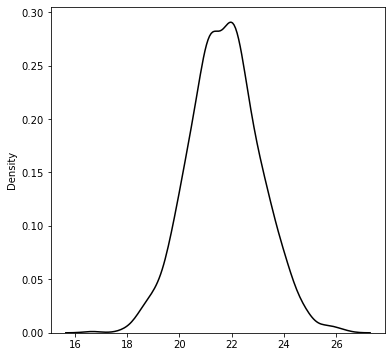

In [7]:
plt.figure(figsize = (6, 6))
sns.kdeplot(θ1, color = 'black');

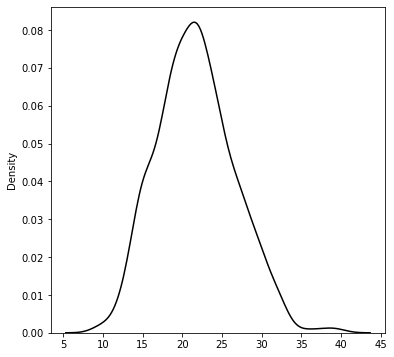

In [8]:
y1986_1 = st.poisson.rvs(θ1)
plt.figure(figsize = (6, 6))
sns.kdeplot(y1986_1, color = 'black');

In [9]:
q1 = np.quantile(y1986_1, (0.025, 0.975))
q1

array([13., 32.])

**(b)** Assume that the numbers of fatal accidents in each year follow independent Poisson
distributions with a constant rate and an exposure in each year proportional to the
number of passenger miles flown. Set a prior distribution for $θ$ and determine the
posterior distribution based on the data for 1976–1985. (Estimate the number of
passenger miles flown in each year by dividing the appropriate columns of Table 2.2
and ignoring round-off errors.) Give a 95% predictive interval for the number of fatal accidents in 1986 under the assumption that $8\; x\; 1011$ passenger miles are flown that
year.

In [10]:
data = data.assign(PasMil = np.round(data.Deaths * 1e8 / data.Rate))
θ2 = st.gamma.rvs(alpha + np.sum(data['Accidents']), scale = 1/(beta + np.sum(data['PasMil'])), size = S)
y1986_2 = st.poisson.rvs(θ2 * 8e11)
q2 = np.quantile(y1986_2, (0.025, 0.975))
q2

array([22., 46.])

**(c)** Repeat (a) above, replacing ‘fatal accidents’ with ‘passenger deaths.’

In [11]:
θ3 = st.gamma.rvs(alpha+np.sum(data['Deaths']), scale = 1/(beta + n), size = S)
y1986_3 = st.poisson.rvs(θ3)
q3 = np.quantile(y1986_3, (0.025, 0.975))
q3

array([579., 682.])

**(d)** Repeat (b) above, replacing ‘fatal accidents’ with ‘passenger deaths.’

In [12]:
θ4 = st.gamma.rvs(alpha + np.sum(data['Deaths']), scale = 1 / (beta + np.sum(data['PasMil'])), size = S)
y1986_4 = st.poisson.rvs(θ4 * 8e11)
q4 = np.quantile(y1986_4, (0.025, 0.975))
q4

array([ 902.975, 1032.025])

**(e)** In which of the cases (a)–(d) above does the Poisson model seem more or less reasonable?
Why? Discuss based on general principles, without specific reference to the
numbers in Table 2.2.

Incidentally, in 1986, there were 22 fatal accidents, 546 passenger deaths, and a death
rate of 0.06 per 100 million miles flown.

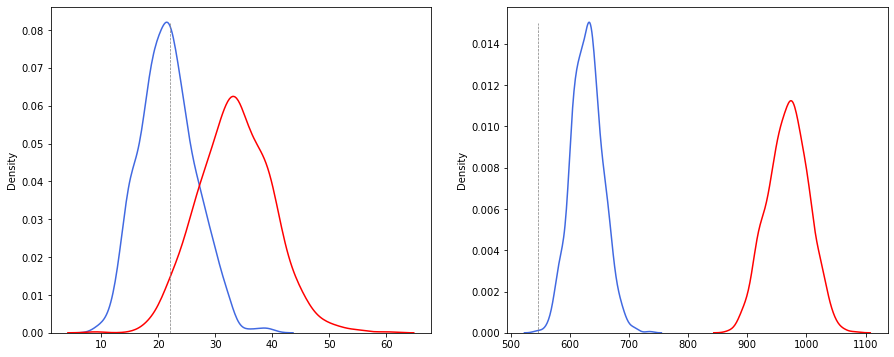

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.kdeplot(y1986_1, color = 'royalblue', ax = ax[0])
sns.kdeplot(y1986_2, color = 'red', ax = ax[0])
ax[0].axvline(22, 0, 0.95, color = 'gray', ls = '--', lw = 0.7)
sns.kdeplot(y1986_3, color = 'royalblue', ax = ax[1])
sns.kdeplot(y1986_4, color = 'red', ax = ax[1])
ax[1].axvline(546, 0, 0.95, color = 'gray', ls = '--', lw = 0.7);

In [14]:
q1, q2, q3, q4

(array([13., 32.]),
 array([22., 46.]),
 array([579., 682.]),
 array([ 902.975, 1032.025]))